In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [10]:
print(train_data.shape)
print(train_data.columns)
print(train_data.dtypes)
print(train_data.describe())

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493


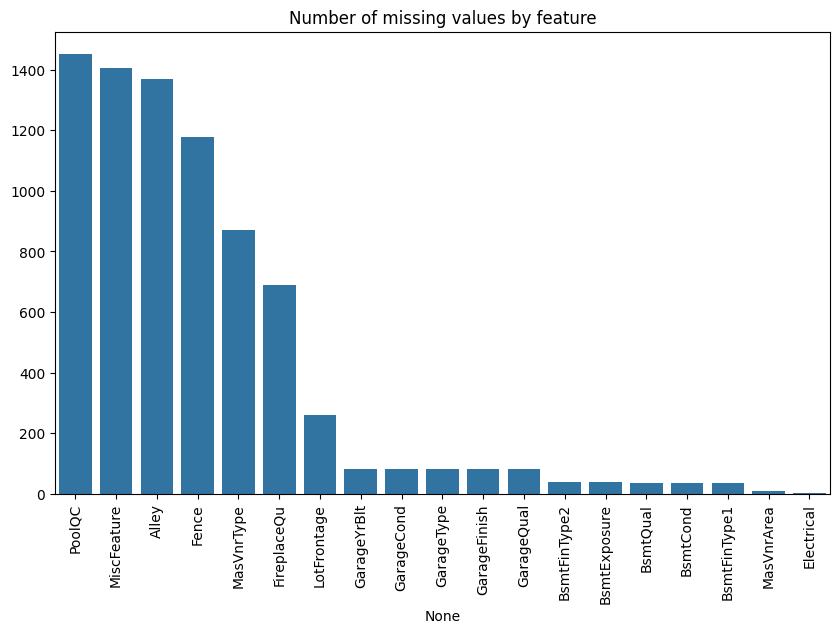

In [11]:
missing_train = train_data.isnull().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train_percent = 100 * missing_train / len(train_data)
missing_train_table = pd.concat([missing_train, missing_train_percent], axis=1, keys=['Total', 'Percent'])
print(missing_train_table)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_train.index, y=missing_train.values)
plt.xticks(rotation=90)
plt.title('Number of missing values by feature')
plt.show()

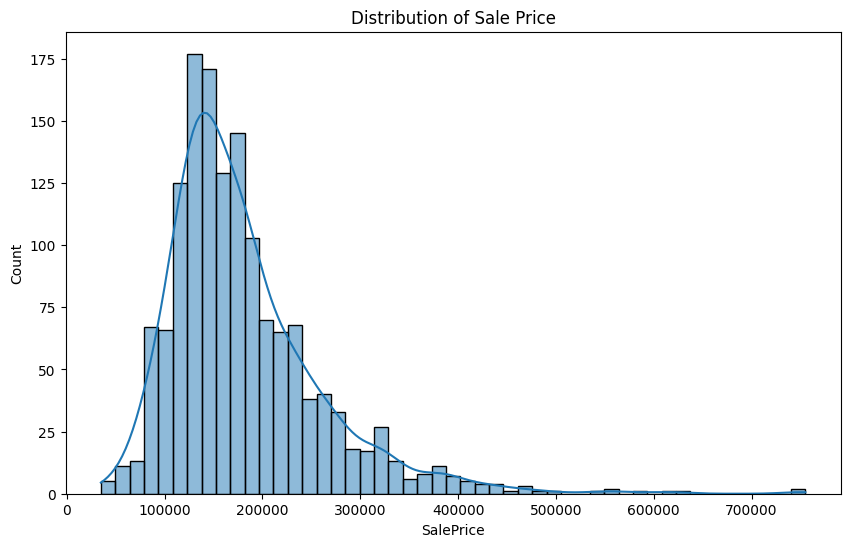

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

print(train_data['SalePrice'].describe())

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

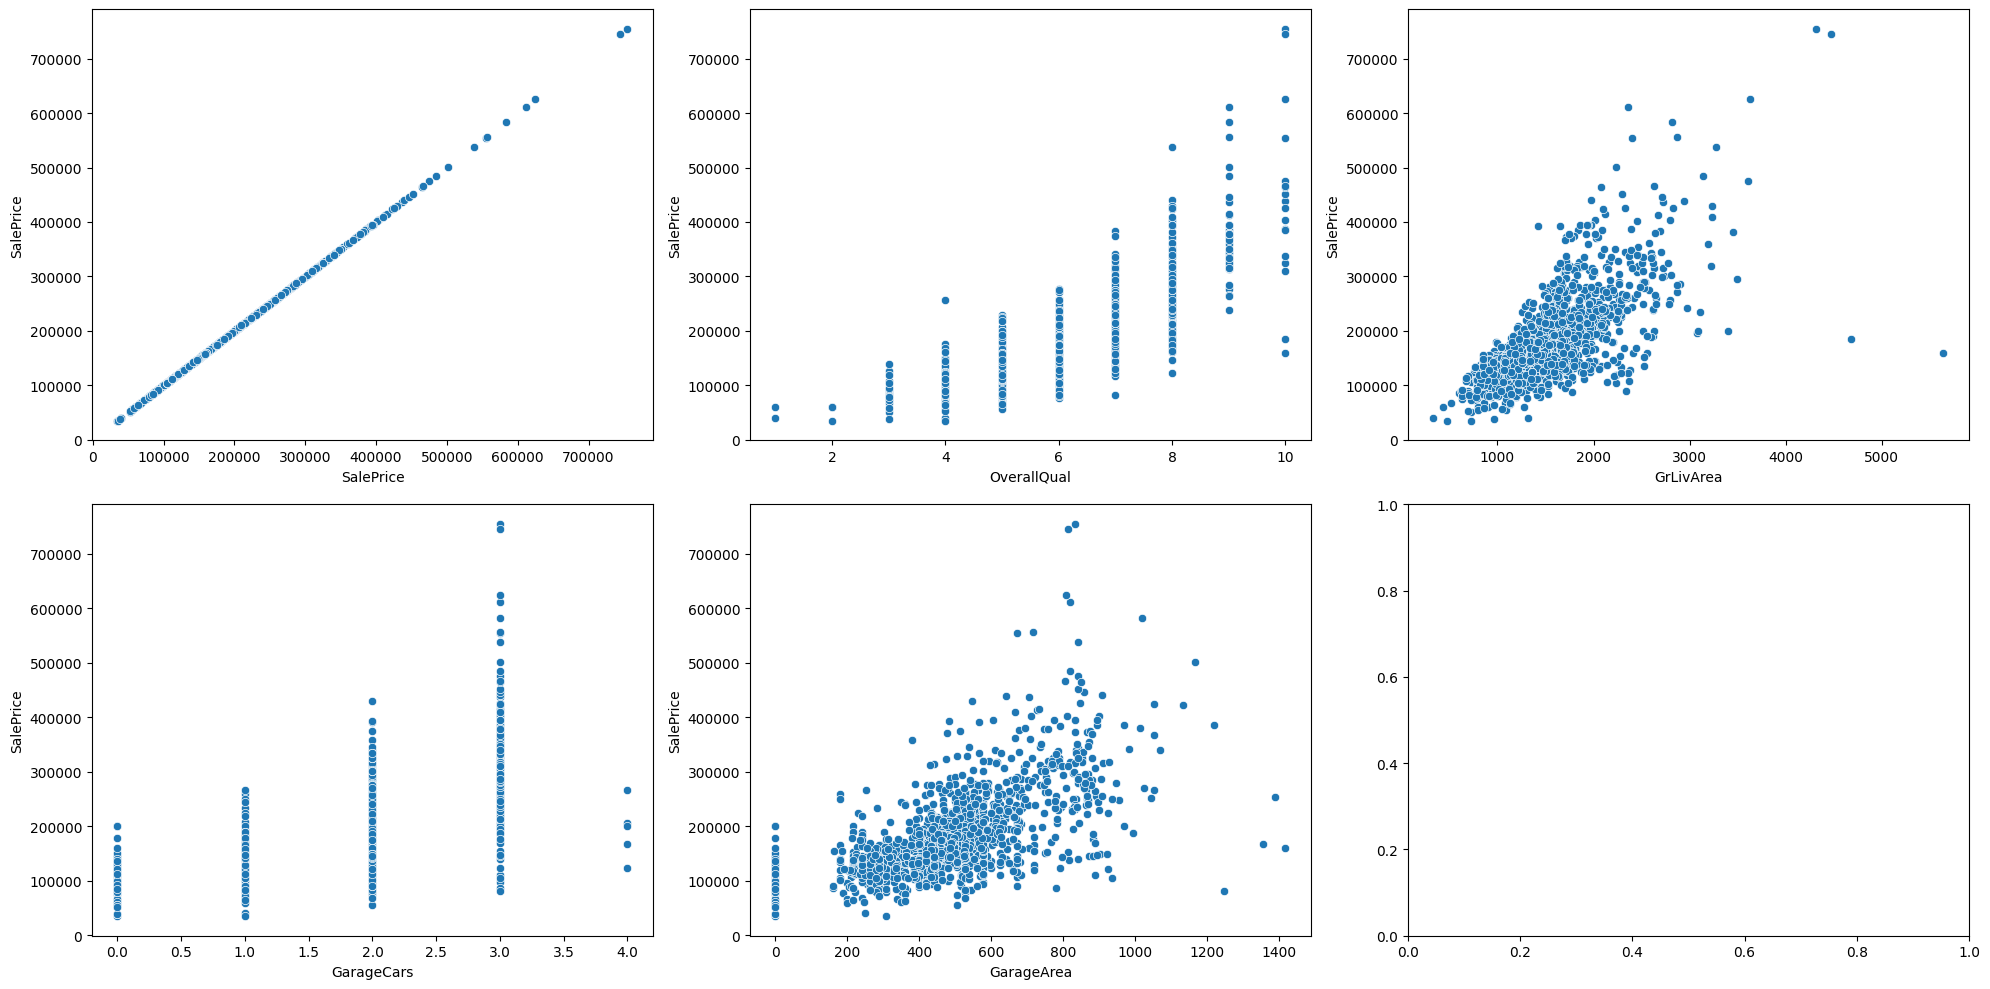

In [13]:
numeric_features = train_data.select_dtypes(include=[np.number]).columns
correlation = train_data[numeric_features].corr()['SalePrice'].sort_values(ascending=False)
print(correlation)

top_features = correlation.index[:5]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, feature in enumerate(top_features):
    sns.scatterplot(x=feature, y='SalePrice', data=train_data, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

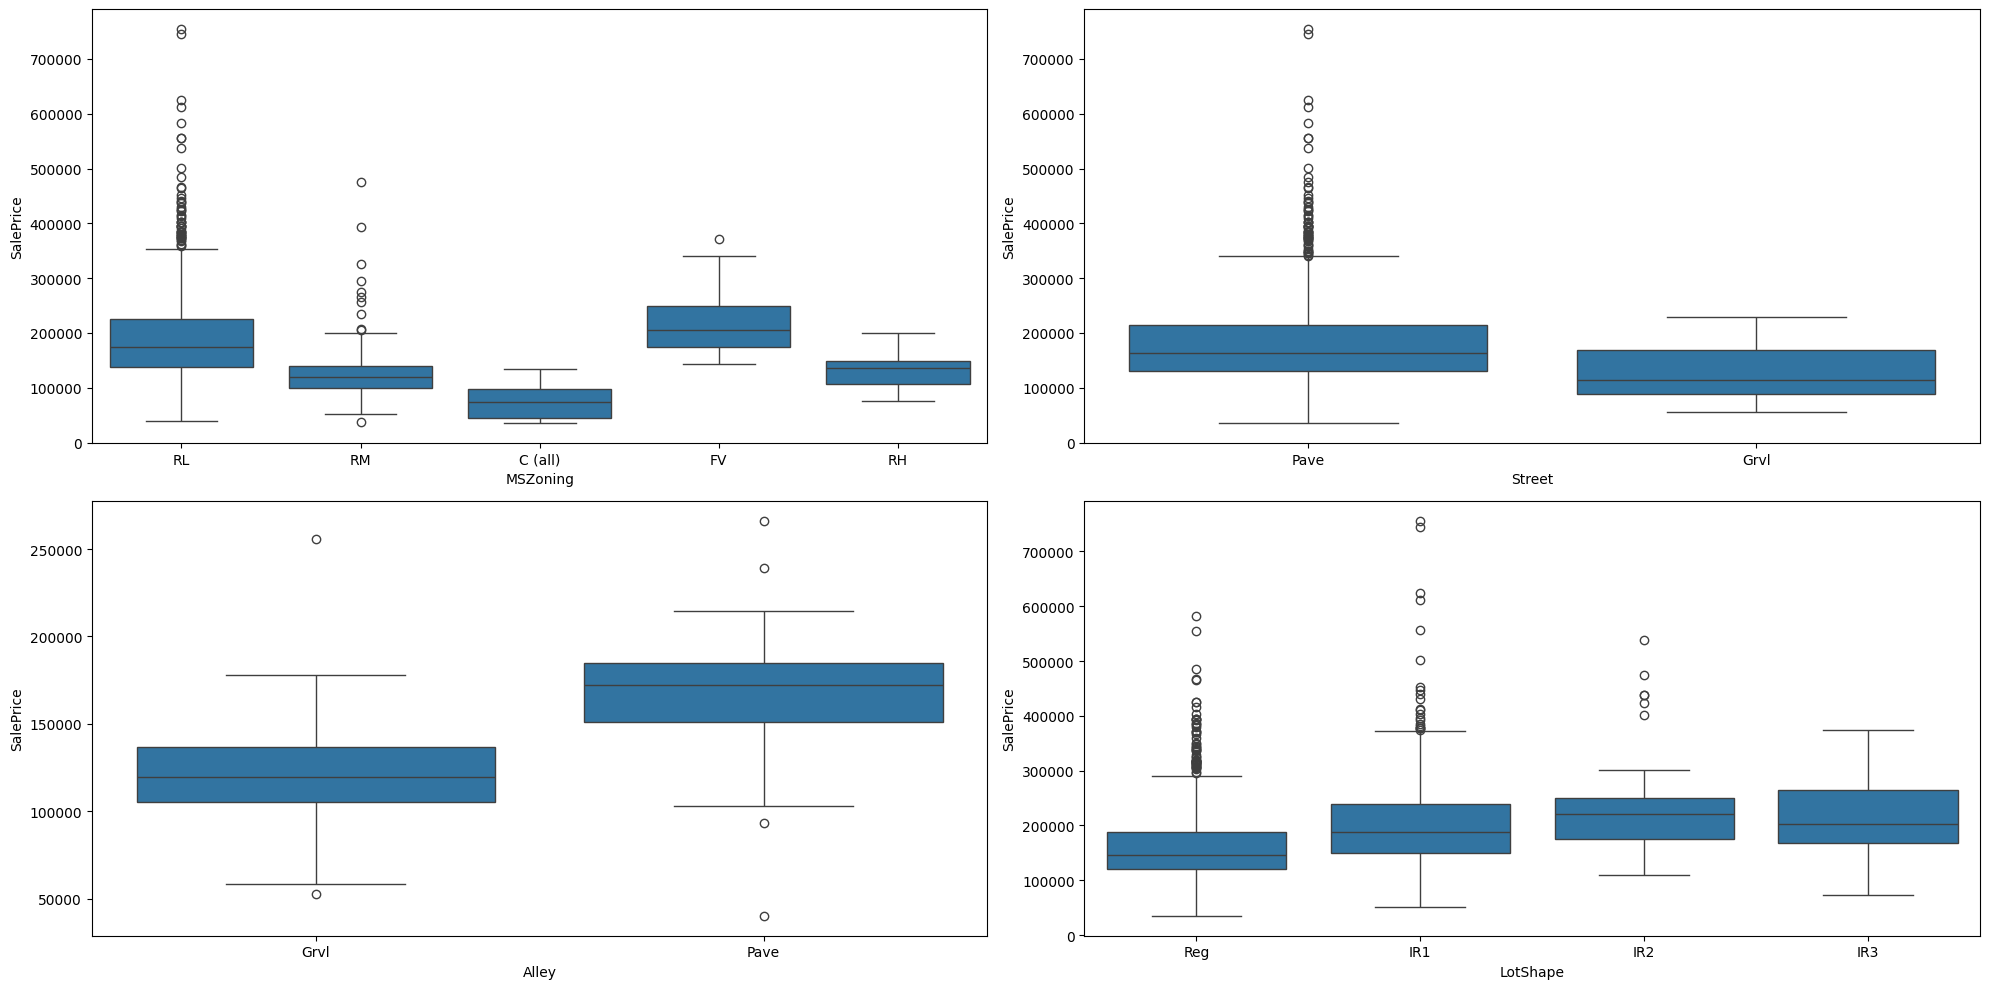

In [14]:
categorical_features = train_data.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, feature in enumerate(categorical_features[:4]):
    sns.boxplot(x=feature, y='SalePrice', data=train_data, ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()